# 01 - Project Introduction: *What are the Meteorological Seasons?*

## Administrative boundaries data
The data are taken from [GADM](https://gadm.org/about.html), version 4.1. Data are distributed in GeoPackage format. Two different files are used:
- **WORLD**: contains the first level (countries) for the entire world (*data/gadm_410-levels.gpkg*)
- **INDIA**: contains the four administration levels of India (*data/gadm41_IND.gpkg*)



#### *Administrative division of India*
- Level 0: Country
- Level 1: States and union territories
- Level 2: District
- Level 3: Taluc

<sub><sup> *DISCLAIMER: Some regions in this area are disputed between states. The authors do not take responsibility for the borders shown, which are sourced from the GADM dataset.* </sup></sub>

In [56]:
import xarray as xr

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
import os


In [2]:
#-- DECLARING DATA PATHS
# Weather data from ERA5
temperature_data_path   = '../data/preprocessed/ERA5/2m_temperature/temperature_15dd198*.nc'
precipitation_data_path = '../data/preprocessed/ERA5/total_precipitation/precipitation_15dd198*.nc'

# Geopackages with boundaries
country_boundary_file   = '../data/raw/external/GADM41_IND.gpkg' 
world_boundary_file     = '../data/raw/external/GADM41_WORLD.gpkg' 

#-- IMPORTING DATA
# Single xarray dataset for ERA5  
dataset = xr.merge([
                xr.open_mfdataset(temperature_data_path).var167.rename('t2m') - 273.15,     # TO_DO move naming and standardization in preprocessing
                xr.open_mfdataset(precipitation_data_path).tp * 1000                        # TO_DO move naming and standardization in preprocessing
                ]).load().resample(time='1D').mean()

# Geodataframes for boudaries - Level 0 is for country boundaries 
country_boundary    = gpd.read_file(country_boundary_file, layer = 'ADM_ADM_0')
world_boundary      = gpd.read_file(world_boundary_file, layer = 'ADM_0')

In [5]:
month_agg = dataset.groupby('time.month').mean().compute()

Text(0.5, 1.04, 'Precipitation Seasonal Cycle')

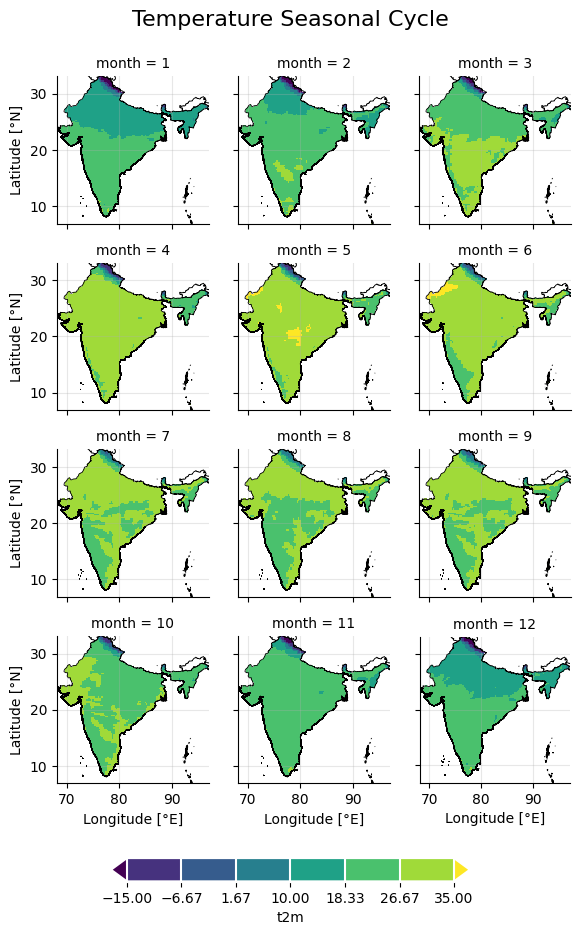

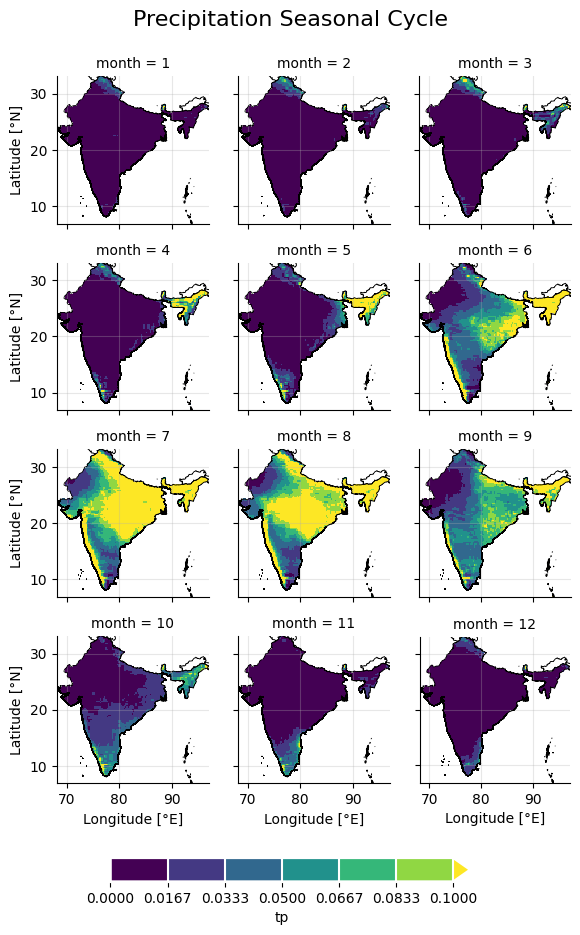

In [127]:
month_t2m_plot = month_agg.t2m.plot(col='month', col_wrap=3, vmin=-15, vmax=35, levels=7, add_colorbar=False, figsize=(6,8))

standard_format( month_t2m_plot,
                 country_boundary   = country_boundary,
                 # world_boundary     = world_boundary,
                 custom_cbar        = True
                )

month_t2m_plot.fig.suptitle('Temperature Seasonal Cycle', size=16, y=1.04)



month_tp_plot = month_agg.tp.plot(col='month', col_wrap=3, vmin=0, vmax=0.1, levels=7, add_colorbar=False, figsize=(6,8))

standard_format( month_tp_plot,
                 country_boundary   = country_boundary,
                 # world_boundary     = world_boundary,
                 custom_cbar        = True
                )

month_tp_plot.fig.suptitle('Precipitation Seasonal Cycle', size=16, y=1.04)